In [72]:
import pandas as pd

# etiquetas de las columnas
columnas = [
    'Class Name',
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups-in-schools',
    'anti-satellite-test-ban',
    'aid-to-nicaraguan-contras',
    'mx-missile',
    'immigration',
    'synfuels-corporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa',
]

dfData = pd.read_csv('assets/house-votes-84.data', names=columnas, index_col='Class Name')

# removemos los datos que no contribuyen en nada
dfData = dfData[dfData['handicapped-infants'] != '?']
dfData = dfData[dfData['water-project-cost-sharing'] != '?']
dfData = dfData[dfData['el-salvador-aid'] != '?']
dfData = dfData[dfData['religious-groups-in-schools'] != '?']
dfData = dfData[dfData['anti-satellite-test-ban'] != '?']
dfData = dfData[dfData['adoption-of-the-budget-resolution'] != '?']
dfData = dfData[dfData['aid-to-nicaraguan-contras'] != '?']
dfData = dfData[dfData['mx-missile'] != '?']
dfData = dfData[dfData['synfuels-corporation-cutback'] != '?']
dfData = dfData[dfData['duty-free-exports'] != '?']
dfData = dfData[dfData['physician-fee-freeze'] != '?']
dfData = dfData[dfData['export-administration-act-south-africa'] != '?']
dfData = dfData[dfData['education-spending'] != '?']
dfData = dfData[dfData['superfund-right-to-sue'] != '?']
dfData = dfData[dfData['crime'] != '?']
print(dfData.head(6))
print("=========================================")

# print(dfData.head(6))
# print("=========================================")
# print(dfData.f)

           handicapped-infants water-project-cost-sharing  \
Class Name                                                  
democrat                     n                          y   
republican                   n                          y   
democrat                     y                          y   
democrat                     y                          y   
democrat                     y                          n   
democrat                     y                          n   

           adoption-of-the-budget-resolution physician-fee-freeze  \
Class Name                                                          
democrat                                   y                    n   
republican                                 n                    y   
democrat                                   y                    n   
democrat                                   y                    n   
democrat                                   y                    n   
democrat                    

In [73]:
# sanitize the data for analysis

dfData = dfData.replace({'y': '1', 'n': '0', '?': '3'})

dfData.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1
freq,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


In [74]:
# training the model

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(dfData, dfData.index, random_state=1, stratify=dfData.index, train_size=0.8)

print("Total data:", dfData.shape[0])
print("Total training data:", xTrain.shape[0])
print("Total test data:", xTest.shape[0])

# check the percentage accorded to each class

print("---------------Original Percentage---------------")
print(dfData.groupby('Class Name').count() / len(dfData))

print('---------------Training Percentage---------------')
print(xTrain.groupby('Class Name').count() / len(xTrain))

print("---------------Test Percentage---------------")
print(xTest.groupby('Class Name').count() / len(xTest))

Total data: 232
Total training data: 185
Total test data: 47
---------------Original Percentage---------------
            handicapped-infants  water-project-cost-sharing  \
Class Name                                                    
democrat               0.534483                    0.534483   
republican             0.465517                    0.465517   

            adoption-of-the-budget-resolution  physician-fee-freeze  \
Class Name                                                            
democrat                             0.534483              0.534483   
republican                           0.465517              0.465517   

            el-salvador-aid  religious-groups-in-schools  \
Class Name                                                 
democrat           0.534483                     0.534483   
republican         0.465517                     0.465517   

            anti-satellite-test-ban  aid-to-nicaraguan-contras  mx-missile  \
Class Name                      

In [75]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(xTrain, yTrain)

# test with predictions

predictions = naive_bayes.predict(xTest)
predictions

array(['republican', 'republican', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'republican', 'republican', 'republican', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'republican', 'republican', 'republican',
       'democrat', 'republican'], dtype='<U10')

In [76]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(yTest, predictions))

Accuracy: 0.9361702127659575


In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yTest, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[22  3]
 [ 0 22]]


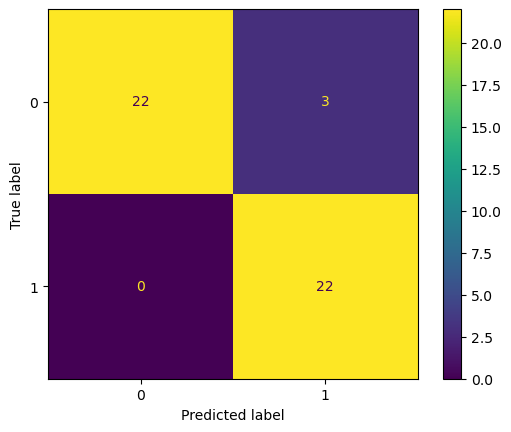

In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()